In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I begin by taking the data and preforming some EDA on it. Primarily properly formatting and analyzing rows and columns.

In [3]:
import numpy as np
import pandas as pd

from pycaret.utils import enable_colab
enable_colab()

from pycaret.regression import *

# Import dataset and preform EDA
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
print(dataset)
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)


Colab mode enabled.
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      f

I then move on to creating 4 different models so that they can all be compared at the end. I also tune these models using the tune_model() method so that the models hyperparameters can be properly tuned for best results.

In [4]:
# Begin Regression Modeling

regression = setup(data = data, target = 'alcohol', session_id=123) 
best = compare_models(exclude = ['ransac'])

# Create models
svm = create_model('svm')
knn = create_model('knn')
ridge = create_model('ridge')
lasso = create_model('lasso')

print(svm)
print(knn)
print(ridge)
print(lasso)

# Tune models
tuned_svm = tune_model(svm)
tuned_knn = tune_model(knn)
tuned_ridge = tune_model(ridge)
tuned_lasso = tune_model(lasso)

print(tuned_svm)
print(tuned_knn)
print(tuned_ridge)
print(tuned_lasso)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.8524  1.1425  1.0689  0.2082  0.0906  0.0799
1     0.9029  1.2376  1.1125  0.1511  0.0946  0.0850
2     0.9775  1.3494  1.1616  0.1417  0.0997  0.0934
3     0.8902  1.1668  1.0802  0.1727  0.0927  0.0850
4     0.9490  1.3516  1.1626  0.1894  0.0992  0.0902
5     0.9045  1.1983  1.0947  0.1911  0.0936  0.0858
6     0.8754  1.1547  1.0746  0.1618  0.0916  0.0828
7     0.9481  1.2744  1.1289  0.1672  0.0976  0.0918
8     0.8733  1.1729  1.0830  0.1944  0.0917  0.0820
9     0.9439  1.2789  1.1309  0.1792  0.0963  0.0894
Mean  0.9117  1.2327  1.1098  0.1757  0.0948  0.0865
Std   0.0387  0.0741  0.0332  0.0197  0.0031  0.0042

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 10
INFO:logs:Lasso(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


SVR(C=2.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                    weights='distance')
Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)
Lasso(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)


I then moved on to graphing the models to better visualize them. I graphed the tuned model, the error of the tuned model, and where applicable, the feature importance plot.

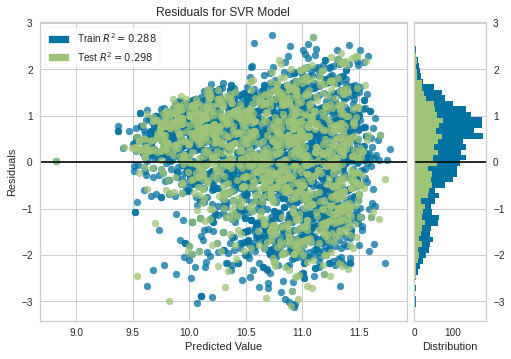

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [5]:
plot_model(tuned_svm)

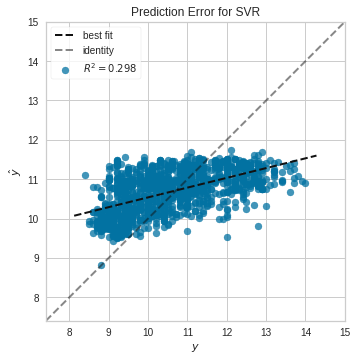

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [6]:
plot_model(tuned_svm, plot='error')

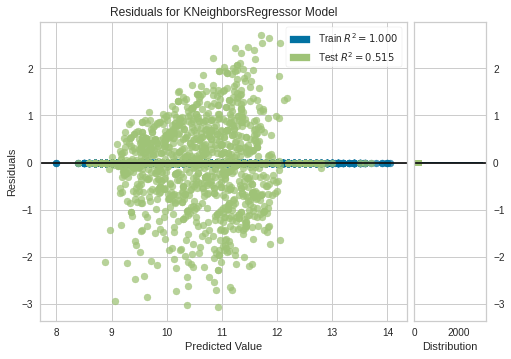

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [7]:
plot_model(tuned_knn)

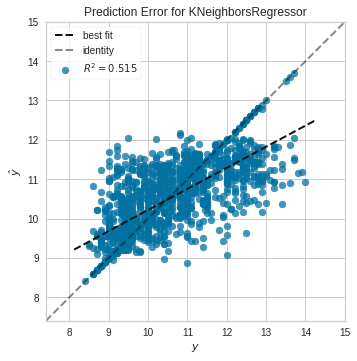

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [8]:
plot_model(tuned_knn, plot='error')

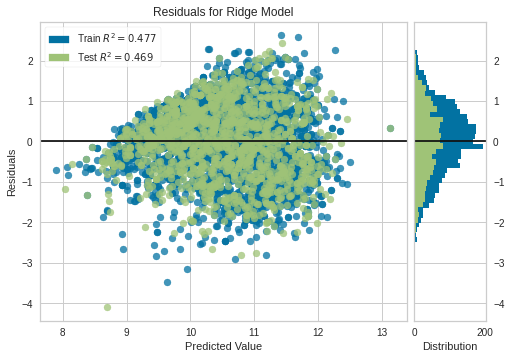

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [9]:
plot_model(tuned_ridge)

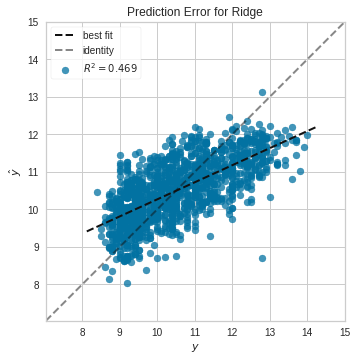

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [10]:
plot_model(tuned_ridge, plot='error')

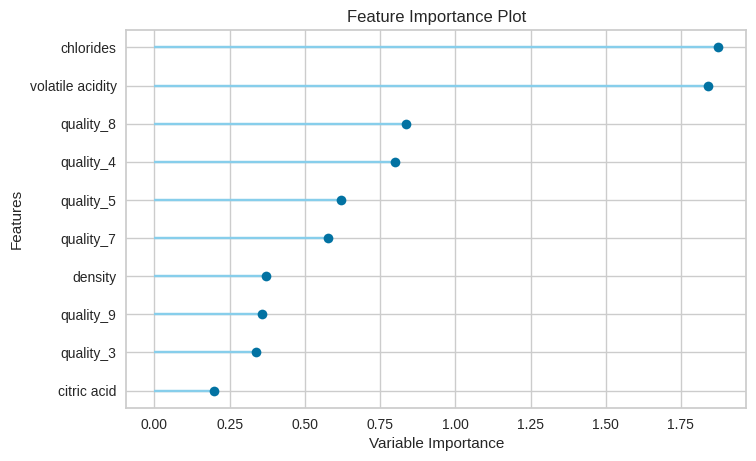

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [11]:
plot_model(tuned_ridge, plot='feature')

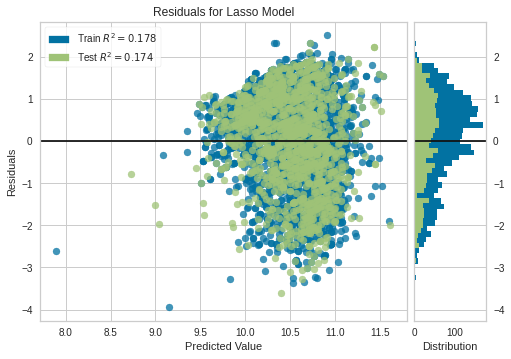

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
plot_model(tuned_lasso)

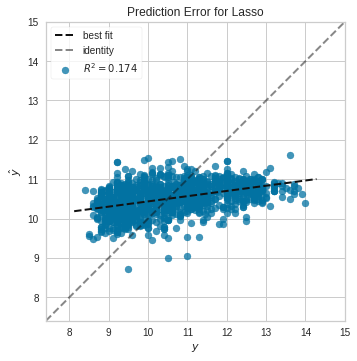

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [13]:
plot_model(tuned_lasso, plot='error')

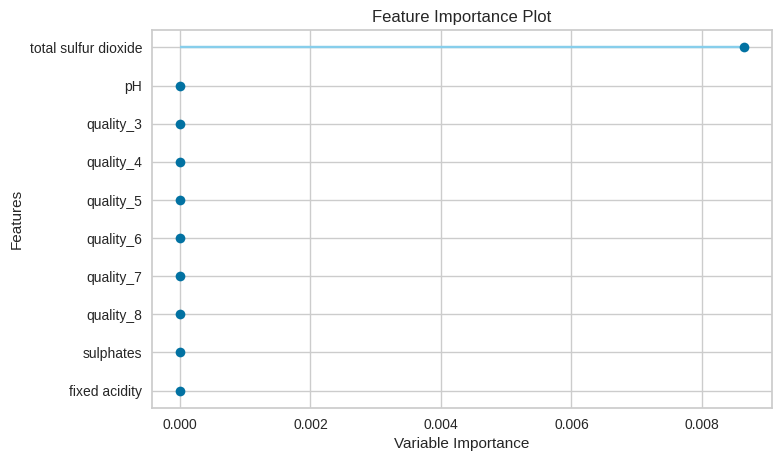

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [14]:
plot_model(tuned_lasso, plot='feature')

I have also included the evaluate_model section for each model so that all other plots can be viewed.

In [15]:
evaluate_model(tuned_svm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=SVR(C=2.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                    weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
evaluate_model(tuned_lasso)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=Lasso(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
evaluate_model(tuned_ridge)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Now I moved on to predicting with the tuned models.

In [19]:
predict_model(tuned_lasso)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Lasso(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE    MSE  RMSE      R2   RMSLE    MAPE
0  Lasso Regression  0.9181  1.232  1.11  0.1738  0.0946  0.0869

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4              0.34         0.10            1.10      0.048   
1               3.8              0.31         0.02           11.10      0.036   
2               6.4              0.31         0.28            1.50      0.037   
3               6.4              0.31         0.38            2.90      0.038   
4               7.8              0.16         0.41            1.70      0.026   
...             ...               ...          ...             ...        ...   
1318            8.2              0.27         0.39            7.80      0.039   
1319            7.4              0.25         0.36            2.05      0.050   
1320            6.7              0.26         0.29            7.70      0.038   
1321            6.7              0.35         0.32            9.00      0.032   
1322            6.5              0.22         0.31            3.90      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    19.0                  84.0  0.99270  3.21       0.38   
1                    20.0                 114.0  0.99248  3.75       0.44   
2                    12.0                 119.0  0.99190  3.32       0.51   
3                    19.0                 102.0  0.99120  3.17       0.35   
4                    29.0                 140.0  0.99100  3.02       0.78   
...                   ...                   ...      ...   ...        ...   
1318                 49.0                 208.0  0.99760  3.31       0.51   
1319                 31.0                 100.0  0.99200  3.19       0.44   
1320                 40.0                 179.0  0.99479  3.23       0.56   
1321                 29.0                 113.0  0.99188  3.13       0.65   
1322                 17.0                 106.0  0.99098  3.15       0.31   

      quality_3  quality_4  quality_5  quality_6  quality_7  quality_8  \
0           0.0        0.0        1.0        0.0        0.0        0.0   
1           0.0        0.0        0.0        1.0        0.0        0.0   
2           0.0        0.0        0.0        0.0        1.0        0.0   
3           0.0        0.0        0.0        0.0        1.0        0.0   
4           0.0        0.0        0.0        1.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1318        0.0        0.0        0.0        1.0        0.0        0.0   
1319        0.0        0.0        0.0        1.0        0.0        0.0   
1320        0.0        0.0        0.0        1.0        0.0        0.0   
1321        0.0        0.0        0.0        0.0        1.0        0.0   
1322        0.0        0.0        1.0        0.0        0.0        0.0   

      quality_9  alcohol      Label  
0           0.0      9.8  10.969919  
1           0.0     12.4  10.710802  
2           0.0     10.4  10.667616  
3           0.0     11.0  10.814449  
4           0.0     12.5  10.486234  
...         ...      ...        ...  
1318        0.0      9.5   9.898901  
1319        0.0     10.8  10.831723  
1320        0.0     10.4  10.149381  
1321        0.0     12.9  10.719440  
1322        0.0     11.5  10.779900  

[1323 rows x 19 columns]

In [20]:
predict_model(tuned_svm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=SVR(C=2.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE   MAPE
0  Support Vector Regression  0.8445  1.0475  1.0235  0.2975  0.0876  0.081

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4              0.34         0.10            1.10      0.048   
1               3.8              0.31         0.02           11.10      0.036   
2               6.4              0.31         0.28            1.50      0.037   
3               6.4              0.31         0.38            2.90      0.038   
4               7.8              0.16         0.41            1.70      0.026   
...             ...               ...          ...             ...        ...   
1318            8.2              0.27         0.39            7.80      0.039   
1319            7.4              0.25         0.36            2.05      0.050   
1320            6.7              0.26         0.29            7.70      0.038   
1321            6.7              0.35         0.32            9.00      0.032   
1322            6.5              0.22         0.31            3.90      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    19.0                  84.0  0.99270  3.21       0.38   
1                    20.0                 114.0  0.99248  3.75       0.44   
2                    12.0                 119.0  0.99190  3.32       0.51   
3                    19.0                 102.0  0.99120  3.17       0.35   
4                    29.0                 140.0  0.99100  3.02       0.78   
...                   ...                   ...      ...   ...        ...   
1318                 49.0                 208.0  0.99760  3.31       0.51   
1319                 31.0                 100.0  0.99200  3.19       0.44   
1320                 40.0                 179.0  0.99479  3.23       0.56   
1321                 29.0                 113.0  0.99188  3.13       0.65   
1322                 17.0                 106.0  0.99098  3.15       0.31   

      quality_3  quality_4  quality_5  quality_6  quality_7  quality_8  \
0           0.0        0.0        1.0        0.0        0.0        0.0   
1           0.0        0.0        0.0        1.0        0.0        0.0   
2           0.0        0.0        0.0        0.0        1.0        0.0   
3           0.0        0.0        0.0        0.0        1.0        0.0   
4           0.0        0.0        0.0        1.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1318        0.0        0.0        0.0        1.0        0.0        0.0   
1319        0.0        0.0        0.0        1.0        0.0        0.0   
1320        0.0        0.0        0.0        1.0        0.0        0.0   
1321        0.0        0.0        0.0        0.0        1.0        0.0   
1322        0.0        0.0        1.0        0.0        0.0        0.0   

      quality_9  alcohol      Label  
0           0.0      9.8  11.365387  
1           0.0     12.4  10.550781  
2           0.0     10.4  11.007091  
3           0.0     11.0  11.151650  
4           0.0     12.5  10.886715  
...         ...      ...        ...  
1318        0.0      9.5  10.086586  
1319        0.0     10.8  11.315351  
1320        0.0     10.4  10.232670  
1321        0.0     12.9  10.748776  
1322        0.0     11.5  10.977553  

[1323 rows x 19 columns]

In [21]:
predict_model(tuned_knn)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                    weights='distance'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  K Neighbors Regressor  0.5856  0.7234  0.8505  0.5149  0.0718  0.0547

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4              0.34         0.10            1.10      0.048   
1               3.8              0.31         0.02           11.10      0.036   
2               6.4              0.31         0.28            1.50      0.037   
3               6.4              0.31         0.38            2.90      0.038   
4               7.8              0.16         0.41            1.70      0.026   
...             ...               ...          ...             ...        ...   
1318            8.2              0.27         0.39            7.80      0.039   
1319            7.4              0.25         0.36            2.05      0.050   
1320            6.7              0.26         0.29            7.70      0.038   
1321            6.7              0.35         0.32            9.00      0.032   
1322            6.5              0.22         0.31            3.90      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    19.0                  84.0  0.99270  3.21       0.38   
1                    20.0                 114.0  0.99248  3.75       0.44   
2                    12.0                 119.0  0.99190  3.32       0.51   
3                    19.0                 102.0  0.99120  3.17       0.35   
4                    29.0                 140.0  0.99100  3.02       0.78   
...                   ...                   ...      ...   ...        ...   
1318                 49.0                 208.0  0.99760  3.31       0.51   
1319                 31.0                 100.0  0.99200  3.19       0.44   
1320                 40.0                 179.0  0.99479  3.23       0.56   
1321                 29.0                 113.0  0.99188  3.13       0.65   
1322                 17.0                 106.0  0.99098  3.15       0.31   

      quality_3  quality_4  quality_5  quality_6  quality_7  quality_8  \
0           0.0        0.0        1.0        0.0        0.0        0.0   
1           0.0        0.0        0.0        1.0        0.0        0.0   
2           0.0        0.0        0.0        0.0        1.0        0.0   
3           0.0        0.0        0.0        0.0        1.0        0.0   
4           0.0        0.0        0.0        1.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1318        0.0        0.0        0.0        1.0        0.0        0.0   
1319        0.0        0.0        0.0        1.0        0.0        0.0   
1320        0.0        0.0        0.0        1.0        0.0        0.0   
1321        0.0        0.0        0.0        0.0        1.0        0.0   
1322        0.0        0.0        1.0        0.0        0.0        0.0   

      quality_9  alcohol      Label  
0           0.0      9.8  11.272605  
1           0.0     12.4  11.184193  
2           0.0     10.4  11.087496  
3           0.0     11.0  11.171770  
4           0.0     12.5  12.500000  
...         ...      ...        ...  
1318        0.0      9.5   9.516465  
1319        0.0     10.8  11.257554  
1320        0.0     10.4  10.199069  
1321        0.0     12.9  10.942646  
1322        0.0     11.5  10.487712  

[1323 rows x 19 columns]

In [22]:
predict_model(tuned_ridge)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE    MSE    RMSE      R2   RMSLE    MAPE
0  Ridge Regression  0.7201  0.792  0.8899  0.4689  0.0761  0.0682

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4              0.34         0.10            1.10      0.048   
1               3.8              0.31         0.02           11.10      0.036   
2               6.4              0.31         0.28            1.50      0.037   
3               6.4              0.31         0.38            2.90      0.038   
4               7.8              0.16         0.41            1.70      0.026   
...             ...               ...          ...             ...        ...   
1318            8.2              0.27         0.39            7.80      0.039   
1319            7.4              0.25         0.36            2.05      0.050   
1320            6.7              0.26         0.29            7.70      0.038   
1321            6.7              0.35         0.32            9.00      0.032   
1322            6.5              0.22         0.31            3.90      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    19.0                  84.0  0.99270  3.21       0.38   
1                    20.0                 114.0  0.99248  3.75       0.44   
2                    12.0                 119.0  0.99190  3.32       0.51   
3                    19.0                 102.0  0.99120  3.17       0.35   
4                    29.0                 140.0  0.99100  3.02       0.78   
...                   ...                   ...      ...   ...        ...   
1318                 49.0                 208.0  0.99760  3.31       0.51   
1319                 31.0                 100.0  0.99200  3.19       0.44   
1320                 40.0                 179.0  0.99479  3.23       0.56   
1321                 29.0                 113.0  0.99188  3.13       0.65   
1322                 17.0                 106.0  0.99098  3.15       0.31   

      quality_3  quality_4  quality_5  quality_6  quality_7  quality_8  \
0           0.0        0.0        1.0        0.0        0.0        0.0   
1           0.0        0.0        0.0        1.0        0.0        0.0   
2           0.0        0.0        0.0        0.0        1.0        0.0   
3           0.0        0.0        0.0        0.0        1.0        0.0   
4           0.0        0.0        0.0        1.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1318        0.0        0.0        0.0        1.0        0.0        0.0   
1319        0.0        0.0        0.0        1.0        0.0        0.0   
1320        0.0        0.0        0.0        1.0        0.0        0.0   
1321        0.0        0.0        0.0        0.0        1.0        0.0   
1322        0.0        0.0        1.0        0.0        0.0        0.0   

      quality_9  alcohol      Label  
0           0.0      9.8  10.870810  
1           0.0     12.4  10.594344  
2           0.0     10.4  11.752707  
3           0.0     11.0  11.809114  
4           0.0     12.5  10.654011  
...         ...      ...        ...  
1318        0.0      9.5   9.909325  
1319        0.0     10.8  11.131657  
1320        0.0     10.4  10.141175  
1321        0.0     12.9  11.287713  
1322        0.0     11.5  10.300759  

[1323 rows x 19 columns]

At this stage I finalize the models in preparation to test them on unseen data.

In [23]:
final_svm = finalize_model(tuned_svm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=SVR(C=2.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing SVR(C=2.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=SVR(C=2.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwa

In [24]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                    weights='distance'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                    weights='distance')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                    weights='distance'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=

In [25]:
final_lasso = finalize_model(tuned_lasso)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=Lasso(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing Lasso(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=Lasso(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False

In [26]:
final_ridge = finalize_model(tuned_ridge)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Imp

Before the unseen data test I do predictions on the final model to ensure everything is still correct.

In [27]:
predict_model(final_svm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=SVR(C=2.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Support Vector Regression  0.8359  1.0306  1.0152  0.3089  0.0868  0.0801

In [28]:
predict_model(final_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                    weights='distance'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE  MSE   RMSE   R2   RMSLE  MAPE
0  K Neighbors Regressor  0.0001  0.0  0.001  1.0  0.0001   0.0

In [29]:
predict_model(final_lasso);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Lasso(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Lasso Regression  0.9194  1.2333  1.1105  0.1729  0.0947  0.0871

In [30]:
predict_model(final_ridge);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Ridge Regression  0.7156  0.7827  0.8847  0.4751  0.0757  0.0678

Below is the prediction of the final SVM model with the unseen data that was left at the beginning of the project. We can see that the MAE, MSE, RMSE, R2, RMSLE, and MAPE are all relatively low. This indicates that the model is well trained and fits the data enough that we gain accurrate predictions but also we are not overfit on the data.

In [31]:
unseen_predictions = predict_model(final_svm, data=data_unseen)
unseen_predictions.head()

from pycaret.utils import check_metric
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'R2')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=SVR(C=2.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Support Vector Regression  0.8739  1.1579  1.0761  0.3076  0.0917  0.0828

0.3076

Below is the prediction of the final KNN model with the unseen data that was left at the beginning of the project. We can see that the MAE, MSE, RMSE, R2, RMSLE, and MAPE are all relatively low. This indicates that the model is well trained and fits the data enough that we gain accurrate predictions but also we are not overfit on the data.

In [32]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

from pycaret.utils import check_metric
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'R2')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                    weights='distance'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  K Neighbors Regressor  0.5235  0.6845  0.8274  0.5906  0.0693  0.0484

0.5906

Below is the prediction of the final Lasso model with the unseen data that was left at the beginning of the project. We can see that the MAE, MSE, RMSE, R2, RMSLE, and MAPE are all relatively low. This indicates that the model is well trained and fits the data enough that we gain accurrate predictions but also we are not overfit on the data.

In [33]:
unseen_predictions = predict_model(final_lasso, data=data_unseen)
unseen_predictions.head()

from pycaret.utils import check_metric
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'R2')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Lasso(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Lasso Regression  0.9576  1.3515  1.1626  0.1918  0.0983  0.0897

0.1918

Below is the prediction of the final Ridge model with the unseen data that was left at the beginning of the project. We can see that the MAE, MSE, RMSE, R2, RMSLE, and MAPE are all relatively low. This indicates that the model is well trained and fits the data enough that we gain accurrate predictions but also we are not overfit on the data.

In [34]:
unseen_predictions = predict_model(final_ridge, data=data_unseen)
unseen_predictions.head()

from pycaret.utils import check_metric
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'R2')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Ridge Regression  0.7594  0.9138  0.9559  0.4536  0.0822  0.0716

0.4536